In [11]:
import scipy.io.wavfile
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal.signaltools as sigtool
rate, data = scipy.io.wavfile.read('a0080.wav')
LenSig = len(data)

In [2]:
rate


2000

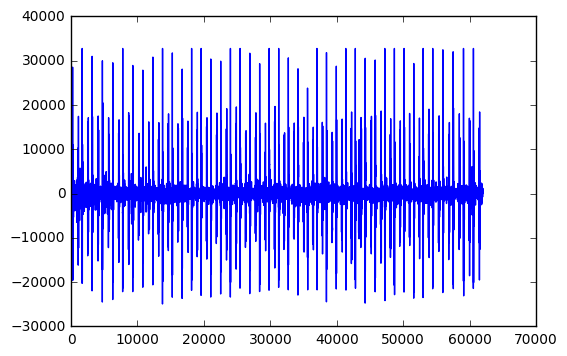

In [10]:
data = np.asarray(data)
plt.plot(data)
plt.show()

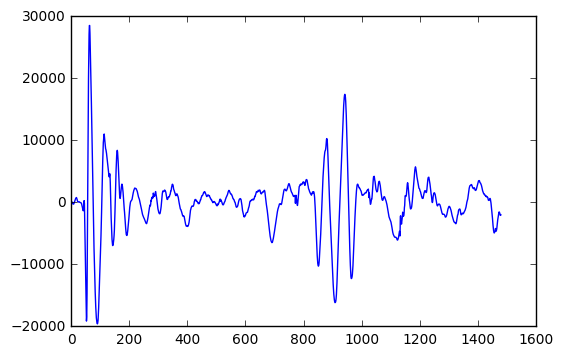

In [4]:
plt.plot(data[170:1650])
plt.show()

## Exploring the spectrum of the signal

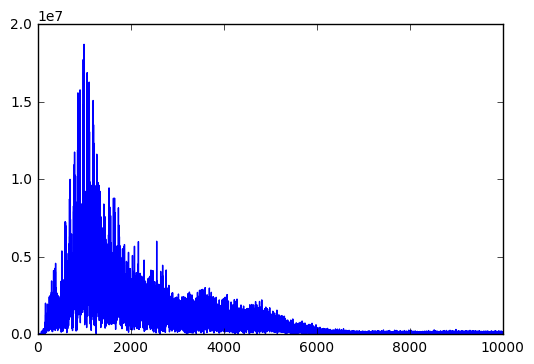

In [5]:
FFT = np.fft.fft(data)
Fcenter = np.argmax(np.abs(FFT[0:10000]))
plt.plot(np.abs(FFT[0:10000]))
plt.show()


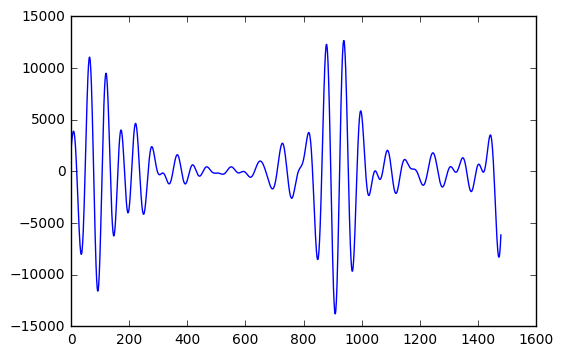

In [6]:
for i in range(len(FFT)/2):
    if (abs(Fcenter-i) > 300):
        FFT[i] = 0
        FFT[-i] = 0
FFTed = np.real(np.fft.ifft(FFT))
plt.plot(FFTed[170:1650])
plt.show()

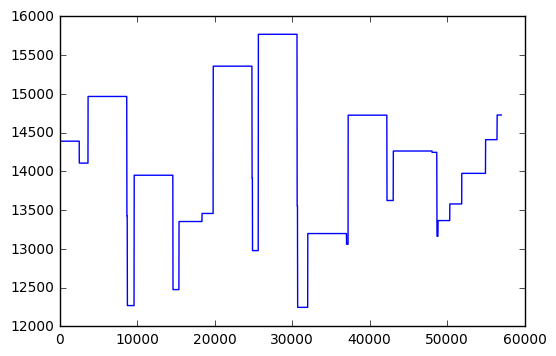

In [8]:
Maxes = []
for k in range(LenSig-5000): # length of two pulses
    Maxes.append(np.amax(FFTed[k:k+5000]))
plt.plot(Maxes)
plt.show()

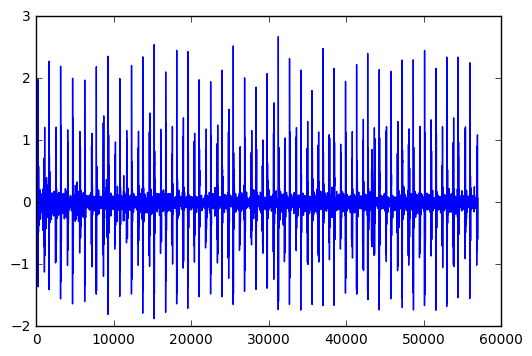

In [9]:
CleanData = []
for k in range(LenSig-5000):
        CleanData.append(data[k]/Maxes[k])
        FFTed
plt.plot(CleanData)
plt.show()

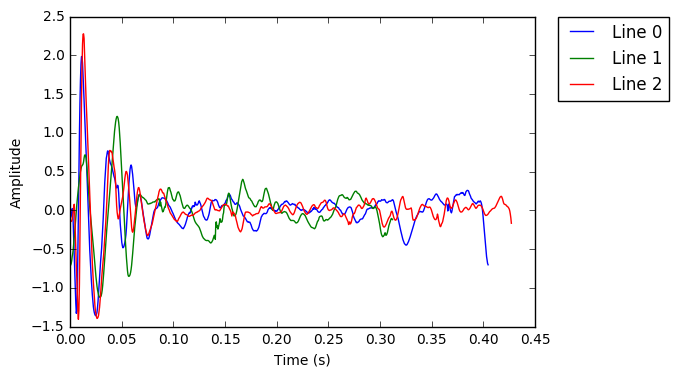

In [35]:
env = np.abs(sigtool.hilbert(FFTed)) # hilbert(s) actually returns the analytical signal
Pulses = np.asarray(env/9000,dtype=int)
IndexPulses = [] 
for i in range(len(Pulses)-1):
    if (not(Pulses[i]) and Pulses[i+1]):
        IndexPulses.append(i)
for k in range(3):
    t = [1.0*x/rate for x in range(IndexPulses[k+1]-IndexPulses[k])]
    plt.plot(t,CleanData[IndexPulses[k]:IndexPulses[k+1]], label='Line '+str(k))
plt.ylabel('Amplitude')
plt.xlabel("Time (s)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()